**__id__**  
Уникальный идентификатор, присвоенный каждой записи о студенте в наборе данных.

**__Gender__**  
Пол студента (например, Мужской, Женский, Другой). Помогает в анализе гендерно-специфических тенденций в области психического здоровья.

**__Age__**  
Возраст студента в годах.

**__City__**  
Город или регион проживания студента, предоставляющие географический контекст для анализа.

**__Profession__**  
Область работы или учебы студента, что может дать понимание факторов стресса, связанных с профессией или учебой.

**__Academic Pressure__**  
Показатель уровня давления, которое испытывает студент в учебной среде. Включает стресс от экзаменов, заданий и общих академических ожиданий.

**__Work Pressure__**  
Показатель давления, связанного с работой или служебными обязанностями. Важно для студентов, которые совмещают работу и учебу.

**__CGPA__**  
Кумулятивный средний балл студента, отражающий общую успеваемость.

**__Study Satisfaction__**  
Показатель удовлетворенности студента учебой, который может коррелировать с психическим благополучием.

**__Job Satisfaction__**  
Показатель удовлетворенности работой или условиями труда студента, если это применимо.

**__Sleep Duration__**  
Среднее количество часов сна студента в сутки, важный фактор для психического здоровья.

**__Dietary Habits__**  
Оценка пищевых привычек и рациона студента, что может влиять на общее состояние здоровья и настроение.

**__Degree__**  
Академическая степень или программа, которую студент изучает.

**__Have you ever had suicidal thoughts ?__**  
Двоичный индикатор (Да/Нет), отражающий, испытывал ли студент когда-либо суицидальные мысли.

**__Work/Study Hours__**  
Среднее количество часов в день, которое студент посвящает работе или учебе, что может влиять на уровень стресса.

**__Financial Stress__**  
Показатель стресса, вызванного финансовыми проблемами, что может сказываться на психическом здоровье.

**__Family History of Mental Illness__**  
Указывает, есть ли в семье история психических заболеваний (Да/Нет), что является важным фактором предрасположенности к психическим проблемам.

**__Depression__**  
Целевая переменная, показывающая, испытывает ли студент депрессию (Да/Нет). Основной фокус анализа.


In [293]:
import warnings
warnings.filterwarnings("ignore")

In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")

print("Path to dataset files:", path)

100%|██████████| 456k/456k [00:00<00:00, 588kB/s]

Extracting files...
Path to dataset files: C:\Users\alexs\.cache\kagglehub\datasets\adilshamim8\student-depression-dataset\versions\1


In [147]:
df = pd.read_csv("student_depression_dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [151]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [153]:
df.nunique()

id                                       27901
Gender                                       2
Age                                         34
City                                        52
Profession                                  14
Academic Pressure                            6
Work Pressure                                3
CGPA                                       332
Study Satisfaction                           6
Job Satisfaction                             5
Sleep Duration                               5
Dietary Habits                               4
Degree                                      28
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             6
Family History of Mental Illness             2
Depression                                   2
dtype: int64

# Type value

In [163]:
types_df = pd.DataFrame(df.dtypes, columns=['dtype'])
types_df['id'] = range(len(types_df))  
types_df = types_df.sort_values(by='dtype')

types_df

,dtype,id
id,int64,0
Depression,int64,17
Age,float64,2
Academic Pressure,float64,5
Work Pressure,float64,6
CGPA,float64,7
Job Satisfaction,float64,9
Work/Study Hours,float64,14
Study Satisfaction,float64,8
City,object,3


Качественные данные:

    Номинальные данные: 0, 1, 3, 4, 12, 13, 16, 17

    Порядковые данные: 10, 11
    
Количественные данные:

    Дискретные данные: 15, 5, 6, 8, 9
    
    Непрерывные данные: 2, 7, 14


In [186]:
df.describe(include=object)

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Financial Stress,Family History of Mental Illness
count,27901,27901,27901,27901,27901,27901,27901,27901,27901
unique,2,52,14,5,4,28,2,6,2
top,Male,Kalyan,Student,'Less than 5 hours',Unhealthy,'Class 12',Yes,5.0,No
freq,15547,1570,27870,8310,10317,6080,17656,6715,14398


In [194]:
df.describe(include=[float, int])

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [196]:
df.nunique()

id                                       27901
Gender                                       2
Age                                         34
City                                        52
Profession                                  14
Academic Pressure                            6
Work Pressure                                3
CGPA                                       332
Study Satisfaction                           6
Job Satisfaction                             5
Sleep Duration                               5
Dietary Habits                               4
Degree                                      28
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             6
Family History of Mental Illness             2
Depression                                   2
dtype: int64

# Visualization

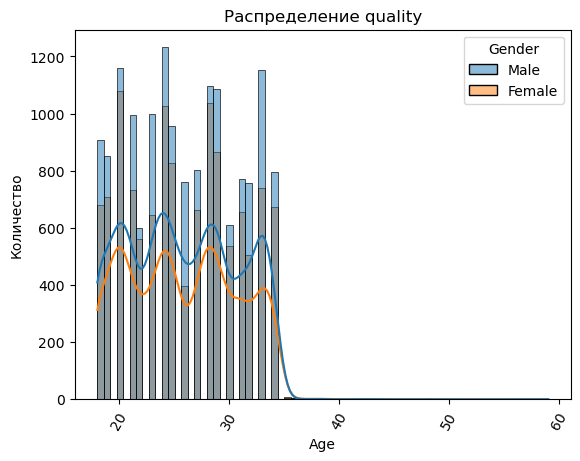

In [355]:
sns.histplot(x='Age', data=df, hue="Gender", kde=True)
plt.title('Распределение quality')
plt.xlabel('Age')
plt.ylabel('Количество')
plt.xticks(rotation=60)
plt.show()

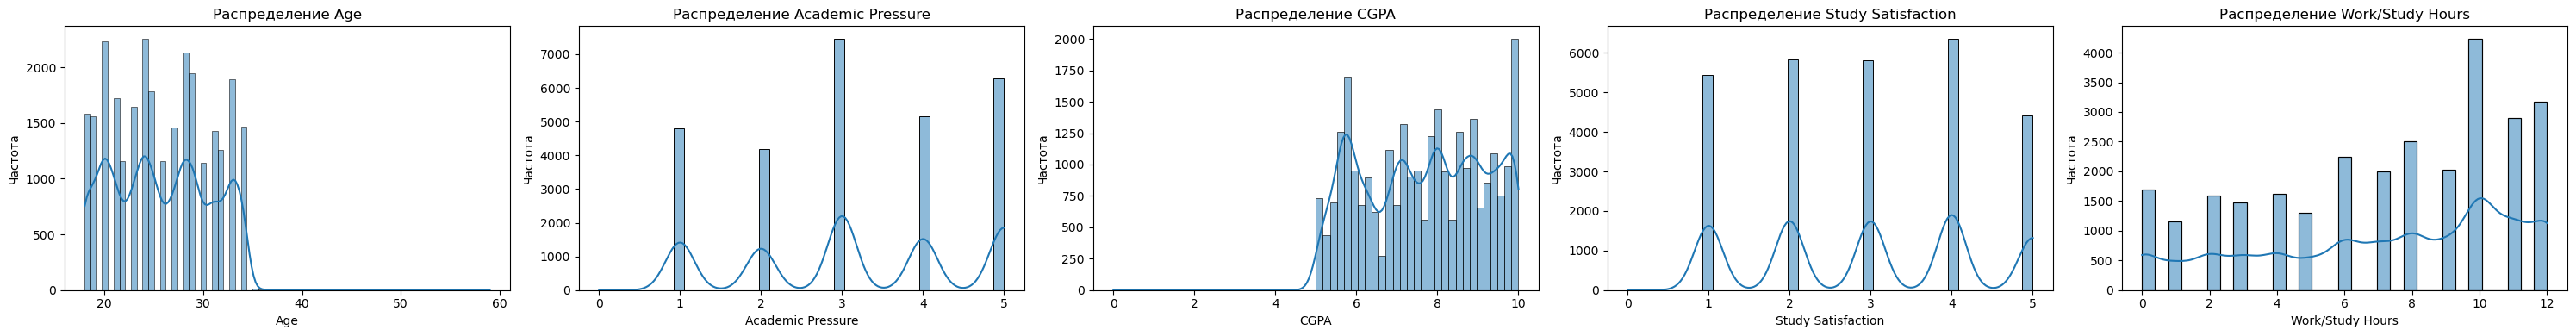

In [357]:
num_cols = ['Age', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Work/Study Hours']  # если есть int чиловая переменная либо + ['col1', 'col2'], либо такие колонки преобразовать во flaot
fig, axes = plt.subplots(1, len(num_cols), figsize=(6 * len(num_cols), 4))

for ax, col in zip(axes, num_cols):
   sns.histplot(data=df, x=col, kde=True, ax=ax)
   ax.set_title(f'Распределение {col}')
   ax.set_xlabel(col)
   ax.set_ylabel('Частота')

plt.tight_layout()
plt.show()

In [278]:
for i in num_cols:
    stat, p_value = stats.shapiro(df[i])
    print(f'Тест Шапиро-Уилка для {i} - {p_value}')

Тест Шапиро-Уилка для Age - 1.2435469807654267e-68
Тест Шапиро-Уилка для Academic Pressure - 6.570676033246124e-86
Тест Шапиро-Уилка для CGPA - 1.8169356707577128e-69
Тест Шапиро-Уилка для Study Satisfaction - 1.5815887485024854e-84
Тест Шапиро-Уилка для Work/Study Hours - 1.5056890316122357e-78


D:\Programs\Anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 27901.
  res = hypotest_fun_out(*samples, **kwds)


Является ли распределение нормальным или отлично от него?
- Все распределения отличны от нормального. Тесты Шапиро-Уилка доказывают это. Все <0,05

- Для Age примерно Пуассона. 
- Для Academic Pressure 
- Для CGPA 
- Для Study Satisfaction 
- Для Work/Study Hours

Концентрация большинства значений?
- Для Age концентрация частоты находится примерно до 35 лет.
- Для Academic Pressure концентрация частоты находится примерно после 1.
- Для CGPA концентрация частоты находится примерно после 4,5.
- Для Study Satisfaction концентрация частоты находится примерно после 1.
- Для Work/Study Hours концентрация есть на всем промежутке. Большая часть после 6.



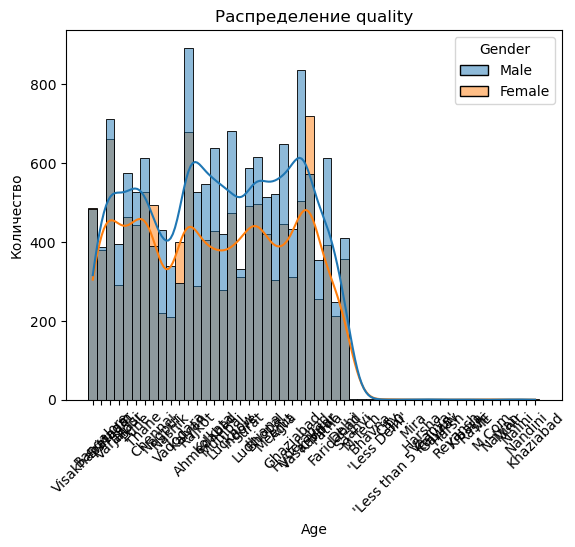

In [361]:
sns.histplot(x='City', data=df, hue="Gender", kde=True)
plt.title('Распределение quality')
plt.xlabel('Age')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

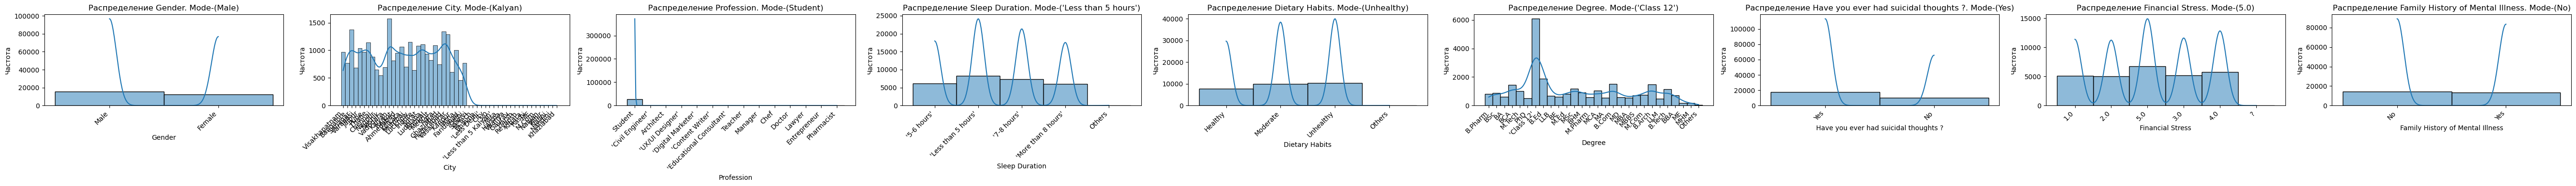

In [363]:
num_cols = df.select_dtypes(include=object).columns 
fig, axes = plt.subplots(1, len(num_cols), figsize=(6 * len(num_cols), 4))

for ax, col in zip(axes, num_cols):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Распределение {col}. Mode-({df[col].mode()[0]})')
    ax.set_xlabel(col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_ylabel('Частота')

plt.tight_layout()
plt.show()

In [325]:
print("в каких значениях концентрируентся переменная?\n")

for i in num_cols:
    print(f"Для - {i} переменная концентрируется в: {df[i].mode()[0]}")

в каких значениях концентрируентся переменная?

Для - Gender переменная концентрируется в: Male
Для - City переменная концентрируется в: Kalyan
Для - Profession переменная концентрируется в: Student
Для - Sleep Duration переменная концентрируется в: 'Less than 5 hours'
Для - Dietary Habits переменная концентрируется в: Unhealthy
Для - Degree переменная концентрируется в: 'Class 12'
Для - Have you ever had suicidal thoughts ? переменная концентрируется в: Yes
Для - Financial Stress переменная концентрируется в: 5.0
Для - Family History of Mental Illness переменная концентрируется в: No


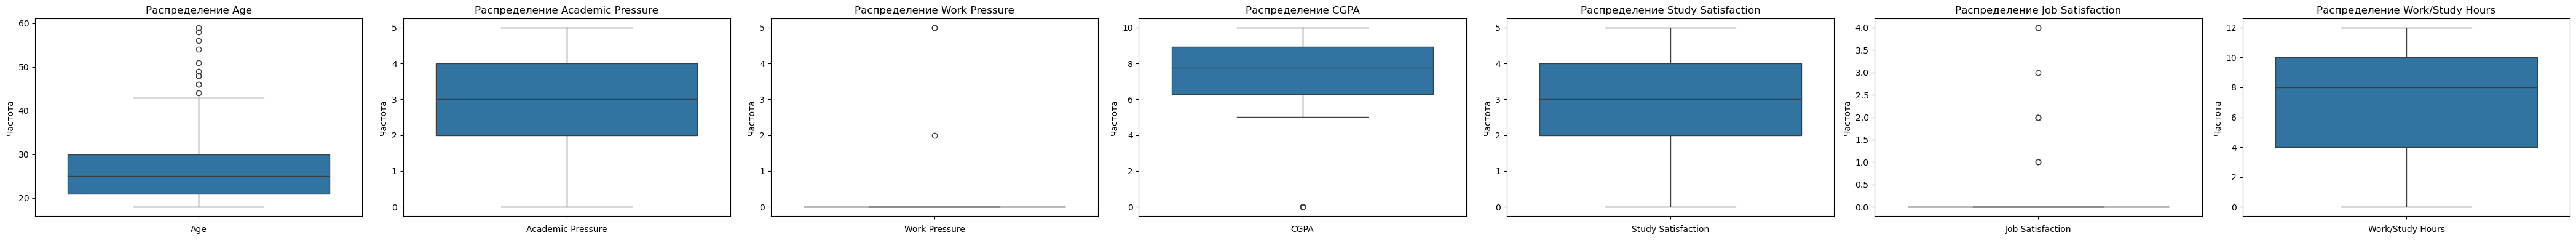

In [211]:
num_cols = df.select_dtypes(include='float').columns # если есть int чиловая переменная либо + ['col1', 'col2'], либо такие колонки преобразовать во flaot
fig, axes = plt.subplots(1, len(num_cols), figsize=(6 * len(num_cols), 4))

for ax, col in zip(axes, num_cols):
   sns.boxplot(df[col], ax=ax)
   ax.set_title(f'Распределение {col}')
   ax.set_xlabel(col)
   ax.set_ylabel('Частота')

plt.tight_layout()
plt.show()

Есть ли выбросы?

Выбросы имеются: 
- Age
- Work Pressure
- CGPA
- Job Satisfaction

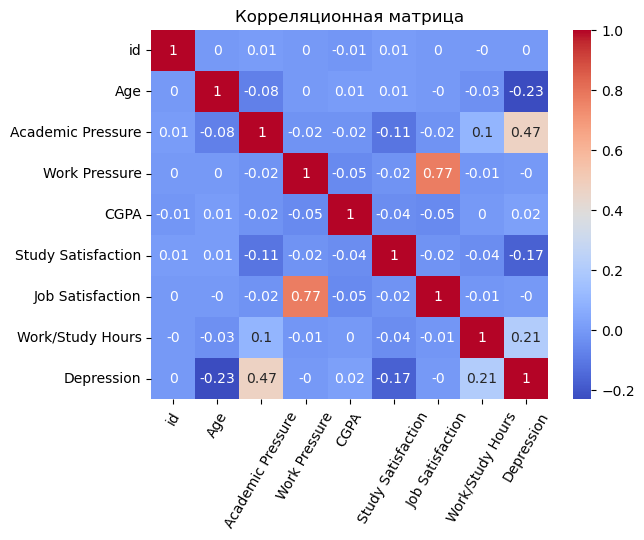

In [229]:
# Корреляционная матрица
correlation_matrix = df.select_dtypes(include=[float, int]).corr().round(2)

# Визуализация тепловой карты
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.xticks(rotation=60)
plt.show()

Какие переменные не коррелируют?
- id - Age
- id - Work Pressure
- id - Job Satisfaction
- id - Depression
- id - Work/Study Hours
- Work Pressure - Depression
- Job Satisfaction - Depression
- Work/Study Hours - CGPA
- Job Satisfaction - Age
- Work Pressure - Age

Какие переменные имеют сильную положительную корреляцию?
- Job Satisfaction - Work Pressure

Какие переменные имеют сильную слабую корреляцию?
- None